<br><br>
<font size='6'><b>Linear Classification</b></font><br><br>


# 1. Supervised Learning

![hi](./image_files/perceptron01.PNG)

# 2. Classification

- where $y$ is a discrete value
    - develop the classification algorithm to determine which class a new input should fall into


- start with binary class problems
    - Later look at multiclass classification problem, although this is just an extension of binary classification


- We could use linear regression
    - Then, threshold the classifier output (i.e. anything over some value is yes, else no)
    - linear regression with thresholding seems to work   


- We will learn
    - perceptron
    - support vector machine
    - logistic regression

# 3. Perceptron

- For input $x = \begin{bmatrix}x_1\\ \vdots\\ x_d \end{bmatrix}\;$ 'attributes of a customer' 


- weights $\omega = \begin{bmatrix}\omega_1\\ \vdots\\ \omega_d \end{bmatrix}$

$$\begin{align*} \text{Approve credit if} \;
& \sum\limits_{i=1}^{d}\omega_ix_i > \text{threshold}, \\
\text{Deny credit if} \;
& \sum\limits_{i=1}^{d}\omega_ix_i < \text{threshold}.
\end{align*}$$

<br>
$$h(x) = \text{sign} \left(\left( \sum\limits_{i=1}^{d}\omega_ix_i \right)- \text{threshold} \right) = \text{sign}\left(\left( \sum\limits_{i=1}^{d}\omega_ix_i \right)+ \omega_0\right)$$

- Introduce an artificial coordinate $x_0 = 1$:

$$h(x) = \text{sign}\left( \sum\limits_{i=0}^{d}\omega_ix_i \right)$$

- In vector form, the perceptron implements

$$h(x) = \text{sign}\left( \omega^T x \right)$$


![hi](./image_files/perceptron02.png)


- Hyperplane

    - Separates a D-dimensional space into two half-spaces
    - Defined by an outward pointing normal vector $\omega$
    - $\omega$ is orthogonal to any vector lying on the hyperplane
    - assume the hyperplane passes through origin, $\omega^T x = 0$ with $x_0 = 1$

![hi](./image_files/perceptron03.png)


## 3.1. Linear Classifier

- represent the decision boundary by a hyperplane $\omega$

- The linear classifier is a way of combining expert opinion.

- In this case, each opinion is made by a binary "expert"


- Goal: to learn the hyperplane $\omega$ using the training data

<br>
![h](image_files/perceptron04.png)
<br>

## 3.2. Perceptron Algorithm

The perceptron implements

$$h(x) = \text{sign}\left( \omega^Tx \right)$$

Given the training set

$$(x_1, y_1), (x_2, y_2), \cdots, (x_N, y_N) \quad \text{where } y_i \in \{-1,1\}$$

1) pick a misclassified point

$$ \text{sign}\left(\omega^Tx_n \right) \neq y_n$$

2) and update the weight vector

$$\omega \leftarrow \omega + y_nx_n$$

<br>
![h](./image_files/perceptron05.png)


__Why perceptron updates work ?__

- Let's look at a misclassified positive example ($y_n = +1$)

    - perceptron (wrongly) thinks $\omega_{old}^T x_n < 0$


- updates would be
$$ \begin{align*}\omega_{new} &= \omega_{old} + y_n x_n = \omega_{old} + x_n \\ \\
\omega_{new}^T x_n &= (\omega_{old} + x_n)^T x_n = \omega_{old}^T x_n + x_n^T x_n  \end{align*}$$



- Thus $\omega_{new}^T x_n$ is <font color='green'>less negative</font> than $\omega_{old}^T x_n$

## 3.3. Iterations of Perceptron

1. Randomly assign $\omega$
<br><br>
2. One iteration of the PLA (perceptron learning algorithm)
    $$\omega \leftarrow \omega + yx$$
    where $(x, y)$ is a misclassified training point
<br><br>
3. At iteration $t = 1, 2, 3, \cdots,$ pick a misclassified point from
    $$(x_1,y_1),(x_2,y_2),\cdots,(x_N, y_N)$$
<br><br>
4. and run a PLA iteration on it
<br><br>
5. That's it!

<br>
![h](./image_files/perceptron06.png)
<br>

## 3.4. Perceptron loss function

$$ L(\omega) = \sum_{n =1}^{m} \max \left\{ 0, -y_n \cdot \left(\omega^T x_n \right)\right\} $$

- Loss = 0 on examples where perceptron is correct, _i.e._, $y_n \cdot \left(\omega^T x_n \right) > 0$


- Loss > 0 on examples where perceptron misclassified, _i.e._, $y_n \cdot \left(\omega^T x_n \right) < 0$


<br>
__note__: $\text{sign}\left(\omega^T x_n \right) \neq y_n$ is equivalent to $ y_n \cdot \left(\omega^T x_n \right) < 0$

## 3.5. The best hyperplane separator?

- Perceptron finds one of the many possible hyperplanes separating the data if one exists


- Of the many possible choices, which one is the best?


- Utilize distance information as well


- Intuitively we want the hyperplane having the maximum margin


- Large margin leads to good generalization on the test data
    - we will see this formally when we cover Support Vector Machine

## 3.6. Python Example

$$ 
\begin{align*}
\omega &= \begin{bmatrix} \omega_1 \\ \omega_2 \\ \omega_3\end{bmatrix}\\
x &= \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \left(x^{(3)}\right)^T\\ \vdots \\ \left(x^{(m)}\right)^T \end{bmatrix} = \begin{bmatrix} 1 & x_1^{(1)} & x_2^{(1)} \\ 1 & x_1^{(2)} & x_2^{(2)} \\ 1 & x_1^{(3)} & x_2^{(3)}\\\vdots & \vdots & \vdots \\ 1 & x_1^{(m)} & x_2^{(m)}\end{bmatrix} \\
y &= \begin{bmatrix}y^{(1)} \\ y^{(2)} \\ y^{(3)}\\ \vdots \\ y^{(m)} \end{bmatrix}
\end{align*}$$



In [1]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
#training data gerneration
m = 100
x1 = 8*np.random.rand(m, 1)
x2 = 7*np.random.rand(m, 1) - 4

g0 = 0.8*x1 + x2 - 3
g1 = g0 - 1
g2 = g0 + 1

In [3]:
C1 = np.where(g1 >= 0)
C2 = np.where(g2 < 0)
print(C1)

(array([ 0,  2,  5,  8, 16, 18, 19, 22, 23, 26, 30, 31, 33, 42, 46, 55, 59,
       62, 64, 67, 72, 77, 83, 99]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0]))


In [4]:
C1 = np.where(g1 >= 0)[0]
C2 = np.where(g2 < 0)[0]
print(C1.shape)
print(C2.shape)

(24,)
(45,)


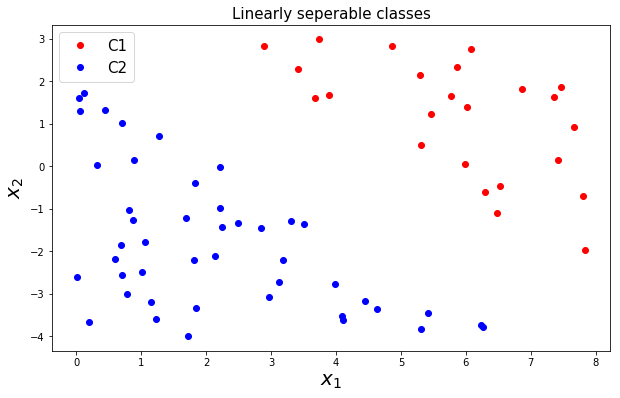

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(x1[C1], x2[C1], 'ro', label='C1')
plt.plot(x1[C2], x2[C2], 'bo', label='C2')
plt.title('Linearly seperable classes', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.show()

$$ 
\begin{align*}
x &= \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \left(x^{(3)}\right)^T\\ \vdots \\ \left(x^{(m)}\right)^T \end{bmatrix} = \begin{bmatrix} 1 & x_1^{(1)} & x_2^{(1)} \\ 1 & x_1^{(2)} & x_2^{(2)} \\ 1 & x_1^{(3)} & x_2^{(3)}\\\vdots & \vdots & \vdots \\ 1 & x_1^{(m)} & x_2^{(m)}\end{bmatrix} \\
y &= \begin{bmatrix}y^{(1)} \\ y^{(2)} \\ y^{(3)}\\ \vdots \\ y^{(m)} \end{bmatrix}
\end{align*}$$

In [6]:
X1 = np.hstack([np.ones([C1.shape[0],1]), x1[C1], x2[C1]])
X2 = np.hstack([np.ones([C2.shape[0],1]), x1[C2], x2[C2]])
X = np.vstack([X1, X2])

y = np.vstack([np.ones([C1.shape[0],1]), -np.ones([C2.shape[0],1])])

X = np.asmatrix(X)
y = np.asmatrix(y)

$$\omega = \begin{bmatrix} \omega_1 \\ \omega_2 \\ \omega_3\end{bmatrix}$$

$$\omega \leftarrow \omega + yx$$ where $(x, y)$ is a misclassified training point

In [7]:
w = np.ones([3,1])
w = np.asmatrix(w)

n_iter = y.shape[0]
for k in range(n_iter):
    for i in range(n_iter):
        if y[i,0] != np.sign(X[i,:]*w)[0,0]:
            w += y[i,0]*X[i,:].T

print(w)

[[-9.        ]
 [ 1.97353111]
 [ 3.8229637 ]]


$$
\begin{align*}
g(x) &= \omega^Tx + \omega_0 = \omega_1x_1 + \omega_2x_2 + \omega_0 = 0 \\
\implies x_2 &= -\frac{\omega_1}{\omega_2} x_1 - \frac{\omega_0}{\omega_2}
\end{align*}
$$

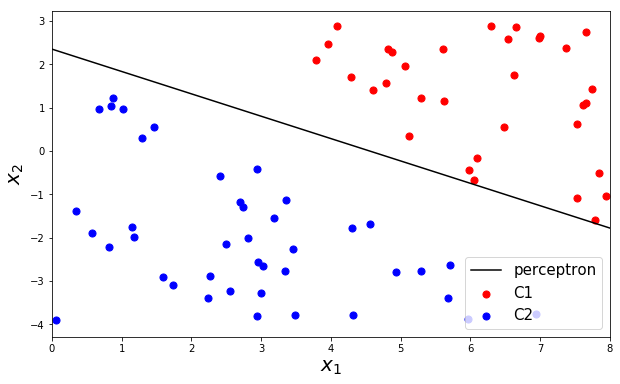

In [8]:
x1p = np.linspace(0,8,100).reshape(-1,1)
x2p = - w[1,0]/w[2,0]*x1p - w[0,0]/w[2,0]

plt.figure(figsize=(10, 6))
plt.scatter(x1[C1], x2[C1], c='r', s=50, label='C1')
plt.scatter(x1[C2], x2[C2], c='b', s=50, label='C2')
plt.plot(x1p, x2p, c='k', label='perceptron')
plt.xlim([0,8])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.legend(loc = 4, fontsize = 15)
plt.show()

In [9]:
# animation

import matplotlib.animation as animation
% matplotlib qt5

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
plot_C1, = ax.plot(x1[C1], x2[C1], 'go', label='C1')
plot_C2, = ax.plot(x1[C2], x2[C2], 'bo', label='C2')
plot_perceptron, = ax.plot([], [], 'k', label='perceptron')

ax.set_xlim(0, 8)
ax.set_ylim(-3.5, 4.5)
ax.set_xlabel(r'$x_1$', fontsize=20)
ax.set_ylabel(r'$x_2$', fontsize=20)
ax.legend(fontsize=15, loc='upper left')

n_iter = y.shape[0]

def init():
    plot_perceptron.set_data(x1p, x2p)
    return plot_perceptron,

def animate(i):
    global w
    idx = i%n_iter
    if y[idx,0] != np.sign(X[idx,:]*w)[0,0]:
        w += y[idx,0]*X[idx,:].T
        x2p = - w[1,0]/w[2,0]*x1p - w[0,0]/w[2,0]
        plot_perceptron.set_data(x1p, x2p)
    return plot_perceptron,
    
w = np.ones([3,1])
x1p = np.linspace(0,8,100).reshape(-1,1)
x2p = - w[1,0]/w[2,0]*x1p - w[0,0]/w[2,0]

ani = animation.FuncAnimation(fig, animate, np.arange(0, n_iter**2), init_func=init,
                              interval=0, repeat=False)
plt.show()

In [10]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>